## Central Limit Theorem Exercise

In [11]:
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st
import matplotlib.pyplot as plt
import random
from random import sample
import statistics

C:\Users\User\AppData\Local\Temp/ipykernel_16308/4141626968.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


array([0.82856629, 0.66453266, 0.55544146, 0.49573962, 0.37018243])

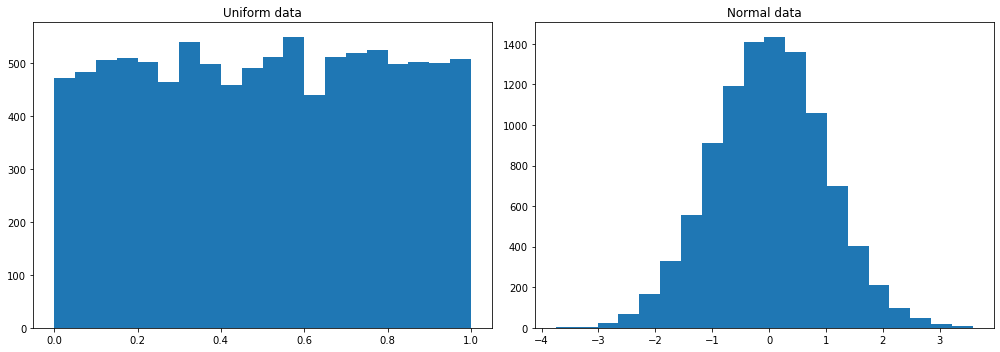

In [8]:
#
uniform = np.random.rand(10000)
normal = np.random.randn(10000)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(uniform, 20)
ax1.set_title('Uniform data')
ax2.hist(normal, 20)
ax2.set_title('Normal data')
fig.tight_layout()
fig.show();
uniform[:5]

### CLT - simulation

### How many samples do we need to take, so that the distribution of means for these samples will pass the shapiro-wilk test for normality if the population is from a Uniform or a Normal distribution?

+ Assume the population has 10,000 observation.
+ Assume sample size is always 50.

We will be suprised to see how fast the test passes for both distributions.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

    p <= alpha: reject H0, not normal.
    p > alpha: fail to reject H0, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

In [23]:
alpha =0.05
count=1
while True:
    uniform_sample = random.sample(list(uniform),50)
    res=st.shapiro(uniform_sample)
    print(f'Sample #: {count}, p-value = {res.pvalue}')
    if res.pvalue > alpha:
        print('Shapiro-wilk test for normality passed on sample #',count)
        break
    count+=1

Sample #: 1, p-value = 0.02629835158586502
Sample #: 2, p-value = 0.01407879963517189
Sample #: 3, p-value = 0.010561538860201836
Sample #: 4, p-value = 0.012000328861176968
Sample #: 5, p-value = 0.2922724783420563
Shapiro-wilk test for normality passed on sample # 5


In [24]:
alpha =0.05
count=1
while True:
    normal_sample = random.sample(list(normal),50)
    res=st.shapiro(normal_sample)
    print(f'Sample #: {count}, p-value = {res.pvalue}')
    if res.pvalue > alpha:
        print('Shapiro-wilk test for normality passed on sample #',count)
        break
    count+=1

Sample #: 1, p-value = 0.9954843521118164
Shapiro-wilk test for normality passed on sample # 1
